In [1]:
import os
from stapep.utils import PhysicochemicalPredictor, ProtParamsSeq

In [2]:
# protein sequence
seq = 'Ac-BATPR8RRR-Aib-B-LBRR3FKRLQ'
# output directory
pathname = 'data'

#### Extracting features from the three-dimensional structure of peptides (obtained from molecular dynamics trajectories)

In [3]:
# initialize the PhysicochemicalPredictor class, which automatically loads trajectory using pytraj.
pcp = PhysicochemicalPredictor(sequence=seq, 
                                topology_file=os.path.join(pathname, 'pep_vac.prmtop'),
                                trajectory_file=os.path.join(pathname, 'traj.dcd'),
                                start_frame=0)

data/traj.dcd data/pep_vac.prmtop


In [4]:
# You can call the calc_helix_percent, calc_extend_percent, and calc_loop_percent methods 
# to respectively calculate the percentages of helix, strand, and coil in the secondary structure.

print('helix percent: ', pcp.calc_helix_percent())
print('sheet percent: ', pcp.calc_extend_percent())
print('loop percent: ', pcp.calc_loop_percent())

helix percent:  0.346
sheet percent:  0.0
loop percent:  0.654


In [5]:
# save the mean structure of the trajectory
pcp._save_mean_structure(os.path.join(pathname, 'mean_structure.pdb'))

# calculate the Mean B-factor, Molecular Surface, Mean Gyration Radius, Hydrophobic Index, and 3D-PSA
print('mean bfactor: ', pcp.calc_mean_bfactor())
print('mol surf: ', pcp.calc_mean_molsurf())
print('mean gyrate: ', pcp.calc_mean_gyrate())
print('hydrophobic index: ', pcp.calc_hydrophobic_index(os.path.join(pathname, 'mean_structure.pdb')))
print('psa: ', pcp.calc_psa(os.path.join(pathname, 'mean_structure.pdb')))
print('total number of hydrogen bonds: ', pcp.calc_n_hbonds())

mean bfactor:  38.72697821752116


mol surf:  1512.912988495018
mean gyrate:  8.655045937052115
hydrophobic index:  0.10714285714285707
psa:  767.0556640625
total number of hydrogen bonds:  4


In [6]:
# extract 2D structure of the peptide
pcp.extract_2d_structure(os.path.join(pathname, 'mean_structure.pdb'))

'[H]C1C([H])C([H])([H])C([H])([H])C([H])([H])C(C(O)N([H])[C@]([H])(C(=O)N([H])[C@]([H])(C(=O)N([H])[C@]([H])(C(=O)O)C([H])(C([H])([H])[H])C([H])([H])[H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[N+]([H])([H])[H])C([H])([H])C([H])([H])C([H])([H])N([H])C(N([H])[H])=[N+]([H])[H])(C([H])([H])[H])N([H])C(=O)[C@]([H])(C([H])([H])C([H])([H])C([H])([H])C([H])([H])[N+]([H])([H])[H])N([H])C(=O)[C@]([H])(C([H])([H])C([H])([H])C(=O)O)N([H])C(=O)[C@]([H])(C([H])(C([H])([H])[H])C([H])([H])[H])N([H])C(=O)[C@]([H])(C([H])([H])C(=O)O)N([H])C(=O)[C@]([H])(C([H])([H])C([H])([H])C(=O)O)N([H])C(=O)[C@]([H])(C([H])([H])C([H])(C([H])([H])[H])C([H])([H])[H])N([H])C(O)C(N([H])C(=O)[C@@]([H])(N([H])C(=O)[C@@]([H])(N([H])C(=O)[C@@]([H])(N([H])C(=O)[C@]([H])(C([H])([H])C([H])([H])C([H])([H])N([H])C(N([H])[H])=[N+]([H])[H])[N+]([H])([H])[H])C([H])([H])C([H])(C([H])([H])[H])C([H])([H])[H])[C@@]([H])(C([H])([H])[H])C([H])([H])C([H])([H])[H])C([H])([H])C([H])([H])C(=O)N([H])[H])(C([H])([H])[H])C([H])([H])C([H])([H

### extract features from sequence

In [7]:
# initialize the ProtParamsSeq class
pps = ProtParamsSeq(seq)

In [8]:
# You can call the following methods to calculate the physicochemical properties of the peptide.
# length, weight, hydrophobicity index, charge, charge density, aromaticity, fraction of arginine, fraction of lysine, lyticity index, and isoelectric point.
print('length: ', pps.seq_length)
print('weight: ', pps.weight)
print('hydrophobicity index: ', pps.hydrophobicity_index)
print('charge', pps.calc_charge(pH=7.0))
print('charge_density', pps.calc_charge_density(pH=7.0))
print('aromaticity', pps.aromaticity)
print('fraction_arginine', pps.fraction_arginine)
print('fraction_lysine', pps.fraction_lysine)
print('lyticity index: ', pps.lyticity_index)
print('isoelectric_point: ', pps.isoelectric_point)

length:  19
weight:  2413.9530000000004
hydrophobicity index:  -0.2000000000000001
charge 5.996
charge_density 0.0024838926027143026
aromaticity 0.05263157894736842
fraction_arginine 0.2631578947368421
fraction_lysine 0.05263157894736842
lyticity index:  114.16199999999999
isoelectric_point:  11.999967765808105


A_2 R8_5
A_2 R_6
T_3 R_6
T_3 R_7
P_4 R_7
P_4 R_8
R8_5 R_8
R8_5 Aib_9
R_6 Aib_9
R_6 L_11
R_7 L_11
R_7 R_13
R_8 R_13
R_8 R3_14
Aib_9 R3_14
Aib_9 F_15
L_11 F_15
L_11 K_16
R_13 K_16
R_13 R_17
R3_14 R_17
R3_14 L_18
F_15 L_18
F_15 Q_19
K_16 Q_19


570.8100000000001

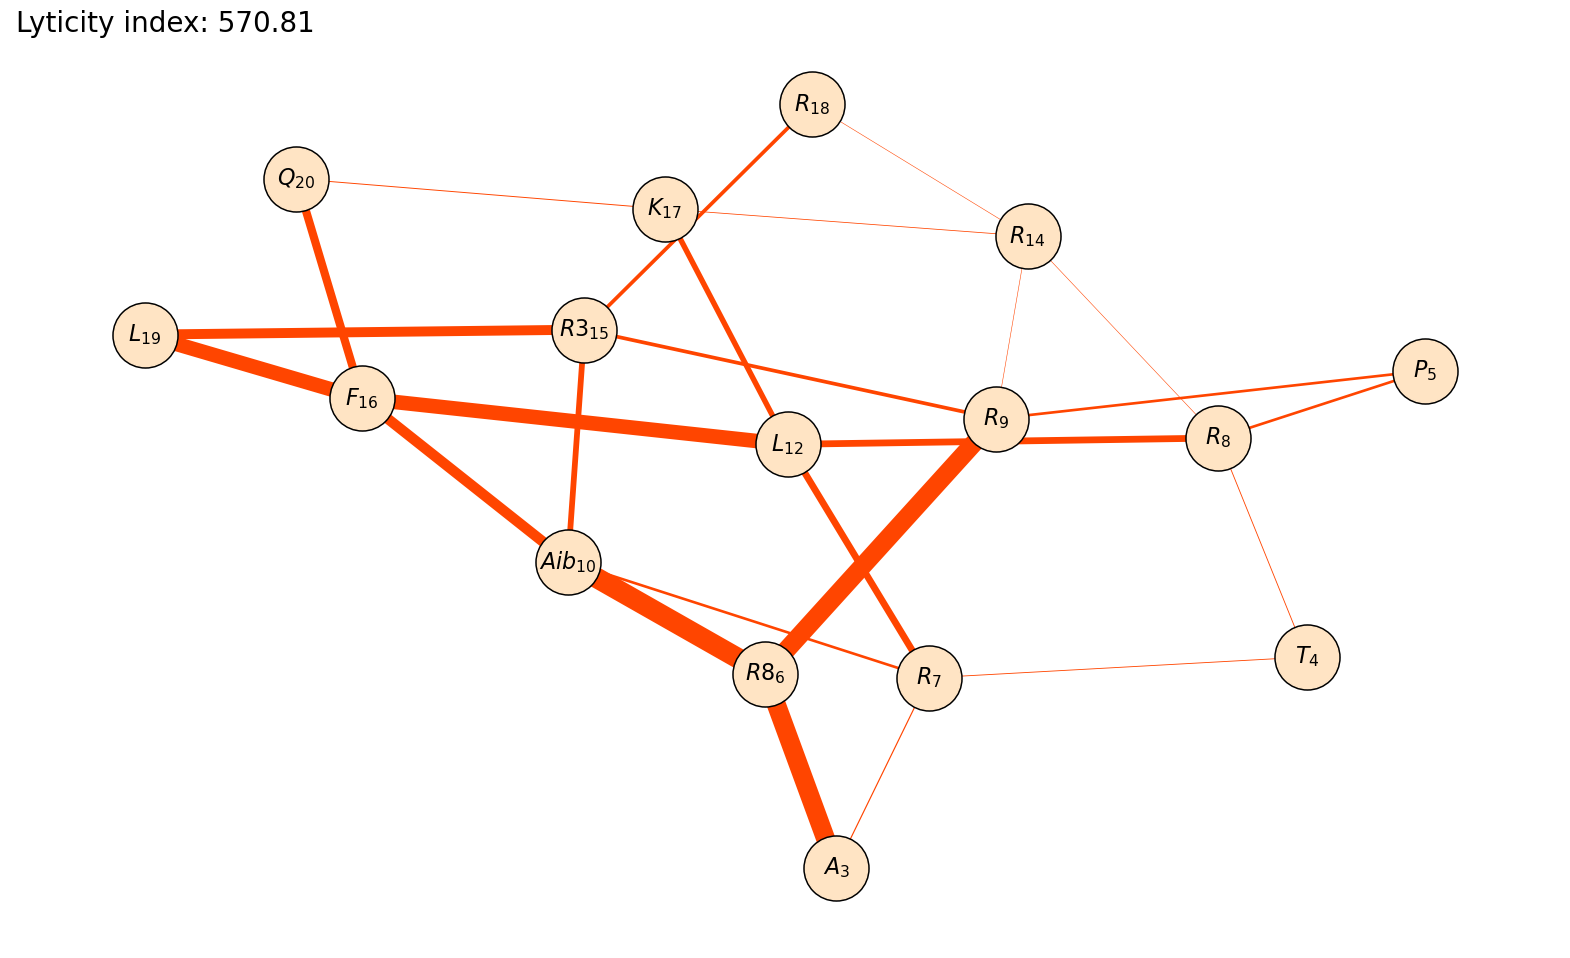

In [9]:
# The lyticity_index is a very useful feature when calculating antimicrobial peptides. 
# Therefore, we have extended its applicability by reevaluating all natural amino acids, 
# six stapled peptide (S3, S5, S8, R3, R5, R8), 
# and two non-standard amino acids (Aib, NLE), 
# and implemented a visualization function.
pps.plot_lyticity_index(os.path.join(pathname, 'lyticity_index.png'))